In [1]:
using Pkg
Pkg.activate(".")
using SymPy
using Plots
using LinearAlgebra

  Activating environment at `C:\Users\fitzgeraldt\Documents\ensc481-2021-examples\class-demos\04-22\Project.toml`


In [2]:
z = symbols("z")
α = symbols("alpha", postive=true, real=true)
zx, zy, θ = symbols("z_x, z_y, theta", real=true)
e(s) = ones(Sym, s)
σ(A,b) = det( sympy.eye(length(b)) - z*A + z*e(length(b))*transpose(b) )/det( sympy.eye(length(b)) - z*A );

## RK-2

In [3]:
A = [0 0; α 0]
b = [1-1/(2α), 1/(2α)]

2-element Vector{Sym}:
 1 - 1/(2*alpha)
     1/(2*alpha)

In [4]:
rk2_ex1 = σ(A,b) |> simplify

 2        
z         
-- + z + 1
2         

In [5]:
ex2 = rk2_ex1 - cos(θ) - 1im*sin(θ) |> subs(z => zx + 1im*zy)

                           2                                
              (z_x + I*z_y)                                 
z_x + I*z_y + -------------- - I*sin(theta) - cos(theta) + 1
                    2                                       

In [6]:
sol = solve( [real(ex2), imag(ex2) ], [zx, zy], dict=true )

4-element Vector{Dict{Any, Any}}:
 Dict(z_y => -sqrt(-sqrt(4*sin(theta)^2 + 4*cos(theta)^2 - 4*cos(theta) + 1)/2 - cos(theta) + 1/2), z_x => (-(2*cos(theta) - 1)*sqrt(-sqrt(4*sin(theta)^2 + 4*cos(theta)^2 - 4*cos(theta) + 1)/2 - cos(theta) + 1/2) - (-sqrt(4*sin(theta)^2 + 4*cos(theta)^2 - 4*cos(theta) + 1)/2 - cos(theta) + 1/2)^(3/2) - sin(theta))/sin(theta))
 Dict(z_y => sqrt(-sqrt(4*sin(theta)^2 + 4*cos(theta)^2 - 4*cos(theta) + 1)/2 - cos(theta) + 1/2), z_x => ((2*cos(theta) - 1)*sqrt(-sqrt(4*sin(theta)^2 + 4*cos(theta)^2 - 4*cos(theta) + 1)/2 - cos(theta) + 1/2) + (-sqrt(4*sin(theta)^2 + 4*cos(theta)^2 - 4*cos(theta) + 1)/2 - cos(theta) + 1/2)^(3/2) - sin(theta))/sin(theta))
 Dict(z_y => -sqrt(sqrt(4*sin(theta)^2 + 4*cos(theta)^2 - 4*cos(theta) + 1)/2 - cos(theta) + 1/2), z_x => (-(2*cos(theta) - 1)*sqrt(sqrt(4*sin(theta)^2 + 4*cos(theta)^2 - 4*cos(theta) + 1)/2 - cos(theta) + 1/2) - (sqrt(4*sin(theta)^2 + 4*cos(theta)^2 - 4*cos(theta) + 1)/2 - cos(theta) + 1/2)^(3/2) - sin(theta))

Only solutions 3 and 4 have real $z_x$ and $z_y$ parts

In [7]:
sol[3][zx] |> subs(θ=>1) |> Float64

-1.939541312852793

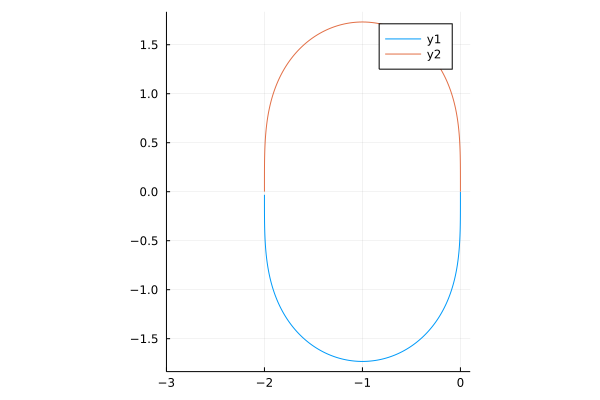

In [8]:
θ3 = LinRange(0,2π-1e-3,200)
l3x = [ subs(sol[3][zx],θ=>t) |> Float64 for t in θ3 ]
l3y = [ subs(sol[3][zy],θ=>t) |> Float64 for t in θ3 ]

θ4 = LinRange(1e-3,2π-1e-3,200)
l4x = [ subs(sol[4][zx],θ=>t) |> Float64 for t in θ4 ]
l4y = [ subs(sol[4][zy],θ=>t) |> Float64 for t in θ4 ]

plot( l3x, l3y, aspect_ratio=:equal, xlim=(-3, 0.1) )
plot!( l4x, l4y )

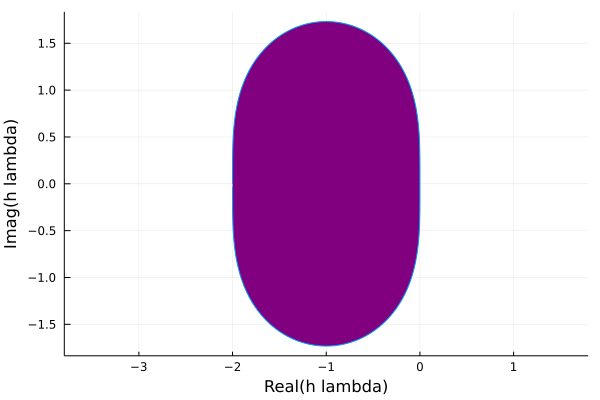

In [9]:
lx = vcat(l3x, l4x)
ly = vcat(l3y, l4y)
plot(lx, ly, fill=(0,:purple), aspect_ratio=:equal, label="", 
    xlabel="Real(h lambda)", ylabel="Imag(h lambda)")

## Higher order examples
Let's see if I can determine the boundary numerically.

In [10]:
ee(s) = ones(Float64,s)
ϕ(z, A, b) = -1 + abs( det( I - z*A + z*ee(length(b))*transpose(b) )/det( I - z*A ) )

ϕ (generic function with 1 method)

In [11]:
A1 = [0 0; 2/3 0]
b1 = [1/4, 3/4]

2-element Vector{Float64}:
 0.25
 0.75

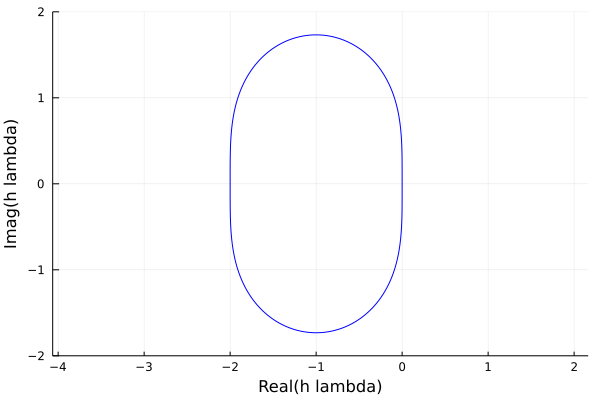

In [13]:
zx = LinRange(-2,0.1, 100)
zy = LinRange(-2,2, 101)
data = [ϕ(Zx+1im*Zy,A1,b1) for Zy in zy, Zx in zx]
plt = contour(zx, zy, data, levels=[0], color=:blue,
    label="RK 2",
    aspect_ratio=:equal,
    colorbar=false,
    xlabel="Real(h lambda)", ylabel="Imag(h lambda)")

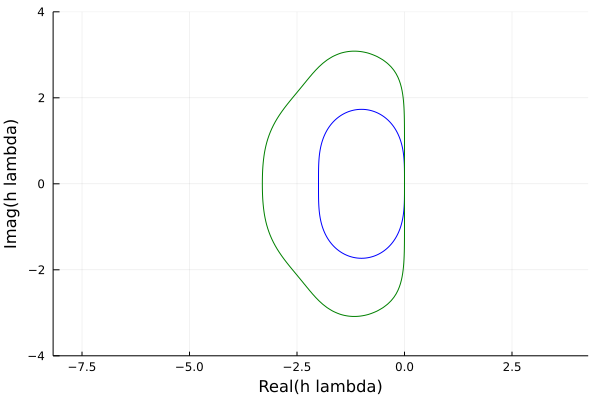

In [14]:
A = [0 0 0 0 0 0 0;
    1/5 0 0 0 0 0 0;
    3/40 9/40 0 0 0 0 0;
    44/45 -56/15 32/9 0 0 0 0;
    19372/6561 -25360/2187 64448/6561 -212/729 0 0 0;
    9017/3168 -355/33 46732/5247 49/176 -5103/18656 0 0; 
    35/384 0 500/1113 125/192 -2187/6784 11/84 0
]
b = [35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0 ]
zx = LinRange(-4,0.1, 100)
zy = LinRange(-4,4, 101)
data = [ϕ(Zx+1im*Zy,A,b) for Zy in zy, Zx in zx]
plot!(plt, zx, zy, data, levels=[0], color=:green, label="Dormand Prince 5")

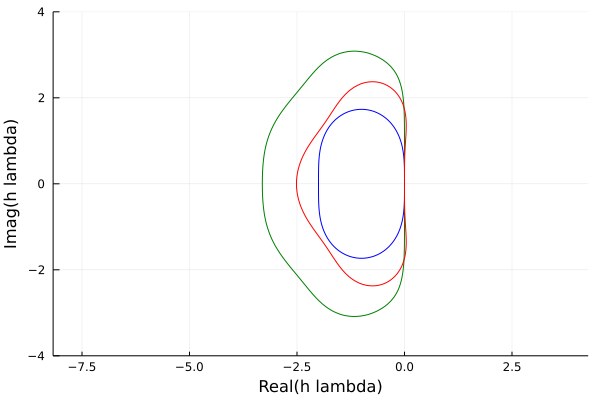

In [15]:
A = [ 0 0 0;
    1 0 0;
    1/4 1/4 0]
b = [1/6, 1/6, 2/3]
zx = LinRange(-3,0.1, 100)
zy = LinRange(-4,4, 101)
data = [ϕ(Zx+1im*Zy,A,b) for Zy in zy, Zx in zx]
plot!( plt, zx, zy, data, levels=[0], color=:red, label="SSPRK3")

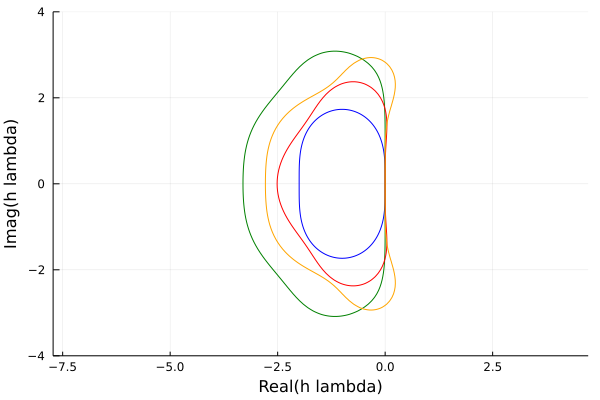

In [16]:
A = [ 0 0 0 0;
    1/2 0 0 0;
    0 1/2 0 0;
    0 0 1 0]
b = [1/6, 1/3, 1/3, 1/6]
zx = LinRange(-4,1, 100)
zy = LinRange(-4,4, 101)
data = [ϕ(Zx+1im*Zy,A,b) for Zy in zy, Zx in zx]
plot!(plt, zx, zy, data, levels=[0], color=:orange, label="Classic RK4")

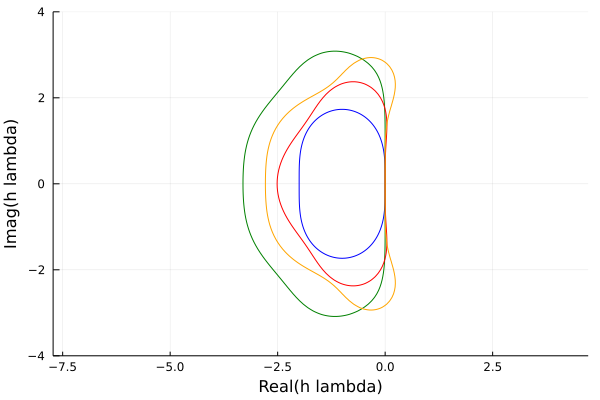

In [17]:
plot!( plt, legend=true)